### Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans,AgglomerativeClustering
import csv
import numpy as np
import time
import calendar
import math

### Importing Data into Pandas Data Frame for Exploratory Analysis

In [2]:
#loading file to pandas dataframe
retail_landing_df = pd.read_excel('Online_Retail.xlsx')
print("File converted to dataframe")

File converted to dataframe


### Exploratory Analysis Of Data Set

In [3]:
# printing structure of dataframe 
print(retail_landing_df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [4]:
# getting summary statistics for numeric columns
print(retail_landing_df.describe())
print("\n")
print("\n")
print(retail_landing_df[['UnitPrice']].describe())
print("\n")
print("\n")
print(retail_landing_df[['Quantity']].describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000




           UnitPrice
count  541909.000000
mean        4.611114
std        96.759853
min    -11062.060000
25%         1.250000
50%         2.080000
75%         4.130000
max     38970.000000




            Quantity
count  541909.000000
mean        9.552250
std       218.081158
min    -80995.000000
25%         1.000000
50%         3.000000
75%        10.000000
max     80995.000000


In [5]:
# computing new columns. Total price is equal to unit price * quantity 
# will be used later to compute avg price vs avg quantity 

retail_landing_df['TotalPrice'] = retail_landing_df['Quantity'] * retail_landing_df['UnitPrice']
print(retail_landing_df.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


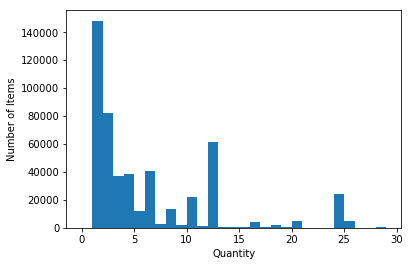

Top 10 Items Most by Quantity


StockCode                         Description  Quantity
   84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
  85099B             JUMBO BAG RED RETROSPOT     47363
   84879       ASSORTED COLOUR BIRD ORNAMENT     36381
   22197                      POPCORN HOLDER     36334
   21212     PACK OF 72 RETROSPOT CAKE CASES     36039
  85123A  WHITE HANGING HEART T-LIGHT HOLDER     35025
   23084                  RABBIT NIGHT LIGHT     30680
   22492             MINI PAINT SET VINTAGE      26437
   22616          PACK OF 12 LONDON TISSUES      26315
   21977  PACK OF 60 PINK PAISLEY CAKE CASES     24753




10 Items Least Purchased by Quantity


StockCode                   Description  Quantity
   23005  printing smudges/thrown away    -19200
   23003  Printing smudges/thrown away     -9058
  72140F                    throw away     -5368
  79323W        Unsaleable, destroyed.     -4830
   20713  wrongly marked. 23343 in box     -3100
   84598                

In [6]:
#1 Identify clusters of purchased items by quantity (E.g.: at least 10, 25 etc.; or buckets i.e.
#  0-20, 20-40, 40-60 etc.)

#Preparing dataframe for question 1 
q1_quant_data = retail_landing_df[['StockCode','Quantity','Description']]

# Finding out the quantity vs number of items which fall in that category
q1_quant_data_agg = q1_quant_data.groupby(['StockCode','Description']).sum().reset_index()
q1_quant_data_agg_quants = list(q1_quant_data['Quantity'])
q1_quant_data_agg_scode = list(q1_quant_data['StockCode'])


# top 10 items 
# Purpose : To get top 10 Items by quantity
# Input : A dataframe consisiting of two columns , Stock Code and Quantity
# Ouptut: Top 10 products by quantity 

def getTop10ByQuantity(df, ascending=True):
    q1_quant_data_agg_topk = df.sort_values(['Quantity'],ascending=ascending).head(10)
    return q1_quant_data_agg_topk


# plotting the values
bins = range(0,30)
plt.hist(q1_quant_data_agg_quants, bins=bins)
plt.xlabel("Quantity")
plt.ylabel("Number of Items")
plt.show()



# Top 10 items purchased by customers
print("Top 10 Items Most by Quantity")
print("\n")
top_10_by_quantity = getTop10ByQuantity(q1_quant_data_agg, ascending=False)
print(top_10_by_quantity.to_string(index=False))

print("\n")
print("\n")

# 10 items least purchased by customers
print("10 Items Least Purchased by Quantity")
print("\n")
top_10_by_quantity = getTop10ByQuantity(q1_quant_data_agg,ascending=True)
print(top_10_by_quantity.to_string(index=False))



#### Identifying items purchased with certain quantity range 

def getClusterByQuantRange(minQuantRange,maxQuantRange):
    q1_quant_data_agg_range = q1_quant_data_agg[(q1_quant_data_agg.Quantity<=maxQuantRange) & (q1_quant_data_agg.Quantity>=minQuantRange)]
    return q1_quant_data_agg_range['StockCode']


Top 10 Priced Items


        StockCode  UnitPrice      Description
222681          M   38970.00           Manual
524602  AMAZONFEE   17836.46       AMAZON FEE
43702   AMAZONFEE   16888.02       AMAZON FEE
43703   AMAZONFEE   16453.71       AMAZON FEE
15016   AMAZONFEE   13541.33       AMAZON FEE
16232   AMAZONFEE   13474.79       AMAZON FEE
524601  AMAZONFEE   11586.50       AMAZON FEE
299982          B   11062.06  Adjust bad debt
446533  AMAZONFEE    8286.22       AMAZON FEE
173277       POST    8142.75          POSTAGE




10 Least priced items


       StockCode  UnitPrice      Description
299983         B  -11062.06  Adjust bad debt
146982     16254       0.00              NaN
433457     21352       0.00            check
433458     84050       0.00            check
433527    47503A       0.00            check
290639     21246       0.00              NaN
290583    84596L       0.00              NaN
290582    47559B       0.00              NaN
290581     23175       0.00            

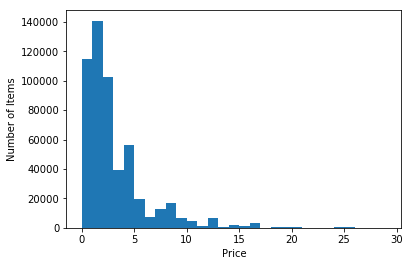

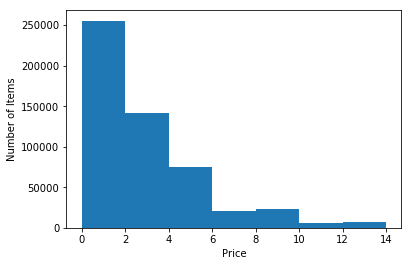

In [7]:
#2 Identify clusters of purchased items by price range


#Preparing dataframe for question 2 
q1_price_data = retail_landing_df[['StockCode','UnitPrice','Description']]

# Finding out the quantity vs number of items which fall in that category
q1_price_data_agg = q1_price_data.drop_duplicates()#groupby(['StockCode','Description','UnitPrice']).
q1_price_data_agg_prices = list(q1_price_data['UnitPrice'])


# top 10 items 
# Purpose : To get top 10 Items by price
# Input : A dataframe consisiting of two columns , Stock Code and Quantity
# Ouptut: Top 10 products by quantity 

def getTop10ByPrice(df, ascending=True):
    q1_quant_data_agg_topk = df.sort_values(['UnitPrice'],ascending=ascending).head(10)
    return q1_quant_data_agg_topk


# getting top 10 priced items
print("Top 10 Priced Items")
print("\n")
top_k_price = getTop10ByPrice(q1_price_data_agg,ascending=False)
print(top_k_price.head(10))

print("\n")
print("\n")

# getting top 10 least priced items
print("10 Least priced items")
print("\n")
least_k_price = getTop10ByPrice(q1_price_data_agg)
print(least_k_price.head(10))

# plotting the values
bins = range(0,30)
plt.hist(q1_price_data_agg_prices, bins=bins)
plt.xlabel("Price")
plt.ylabel("Number of Items")
plt.show()

# A more detailed view  by avoiding values after 15 since they are few in number

bins = range(0,15,2)
plt.hist(q1_price_data_agg_prices, bins=bins)
plt.xlabel("Price")
plt.ylabel("Number of Items")
plt.show()



In [8]:
# storing different countries in the dataset for Question 4,5,6,7

country_df = retail_landing_df[['Country']].drop_duplicates()
country_list = list(country_df['Country'])

print(country_list)


['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria', 'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community', 'Malta', 'RSA']


In [9]:
# Question 4,5 
# Top Purchase Items based on country 
for country in country_list:
    item_df = retail_landing_df[(retail_landing_df.Country == country)]
    top_10_items_quant_df = getTop10ByQuantity(item_df[['StockCode','Quantity','Description']],ascending=False)
    top_10_items_price_df = getTop10ByPrice(item_df[['StockCode','UnitPrice','Description']],ascending=False)
    bottom_10_items_quant_df = getTop10ByQuantity(item_df[['StockCode','Quantity','Description']])
    bottom_10_items_price_df = getTop10ByPrice(item_df[['StockCode','UnitPrice','Description']])
    print("Top 10 Items Purchased by customers in {0}".format(country))
    print(top_10_items_quant_df.to_string(index=False))
    print("\n")
    print("10 Items Least Purchased / Cancelled Items by customers in {0}".format(country))
    print(bottom_10_items_quant_df.to_string(index=False))
    print("\n")
    print("Top 10 Items By Price in {0}".format(country))
    print(top_10_items_price_df.to_string(index=False))
    print("\n")
    print("10 Least Priced Items / Cancelled Items in {0}".format(country))
    print(bottom_10_items_price_df.to_string(index=False))
    print("\n\n")

    
    
    

Top 10 Items Purchased by customers in United Kingdom
StockCode  Quantity                          Description
   23843     80995          PAPER CRAFT , LITTLE BIRDIE
   23166     74215       MEDIUM CERAMIC TOP STORAGE JAR
   84826     12540       ASSTD DESIGN 3D PAPER STICKERS
   37413      5568                                  NaN
   84077      4800    WORLD WAR 2 GLIDERS ASSTD DESIGNS
   22197      4300                 SMALL POPCORN HOLDER
  85123A      4000                                    ?
   22053      3906                EMPIRE DESIGN ROSETTE
   18007      3186  ESSENTIAL BALM 3.5g TIN IN ENVELOPE
   21108      3114   FAIRY CAKE FLANNEL ASSORTED COLOUR


10 Items Least Purchased / Cancelled Items by customers in United Kingdom
StockCode  Quantity                          Description
   23843    -80995          PAPER CRAFT , LITTLE BIRDIE
   23166    -74215       MEDIUM CERAMIC TOP STORAGE JAR
   23005     -9600         printing smudges/thrown away
   23005     -9600         p




Top 10 Items Purchased by customers in EIRE
StockCode  Quantity                        Description
  17084R      1440              ASSORTED INCENSE PACK
   84212       960      ASSORTED FLOWER COLOUR "LEIS"
   22266       640    EASTER DECORATION HANGING BUNNY
   22197       500                     POPCORN HOLDER
   22950       432       36 DOILIES VINTAGE CHRISTMAS
   22151       432          PLACE SETTING WHITE HEART
   22666       408    RECIPE BOX PANTRY YELLOW DESIGN
   22667       408              RECIPE BOX RETROSPOT 
   22197       400               SMALL POPCORN HOLDER
   21292       384  SMALL STRIPES CHOCOLATE GIFT BAG


10 Items Least Purchased / Cancelled Items by customers in EIRE
StockCode  Quantity                          Description
   22950      -288         36 DOILIES VINTAGE CHRISTMAS
   22952      -240      60 CAKE CASES VINTAGE CHRISTMAS
   23157      -240           SET OF 6 NATIVITY MAGNETS 
   22910      -200    PAPER CHAIN KIT VINTAGE CHRISTMAS
   22630    




Top 10 Items Purchased by customers in Belgium
StockCode  Quantity                         Description
  84536B       272        FAIRY CAKES NOTEBOOK A7 SIZE
   23310       180             BUBBLEGUM RING ASSORTED
   22489       144      PACK OF 12 TRADITIONAL CRAYONS
   21212       120     PACK OF 72 RETROSPOT CAKE CASES
   21977       120  PACK OF 60 PINK PAISLEY CAKE CASES
   22417       120      PACK OF 60 SPACEBOY CAKE CASES
   22492       108             MINI PAINT SET VINTAGE 
   16045       100          POPART WOODEN PENCILS ASST
   20724       100         RED RETROSPOT CHARLOTTE BAG
   22355       100           CHARLOTTE BAG SUKI DESIGN


10 Items Least Purchased / Cancelled Items by customers in Belgium
StockCode  Quantity                          Description
   20981       -12        12 PENCILS TALL TUBE WOODLAND
   23660       -12                   HENRIETTA HEN MUG 
   22659        -6              LUNCH BOX I LOVE LONDON
   21318        -6            GLASS CHALICE BLUE S


Top 10 Items By Price in Cyprus
StockCode  UnitPrice                         Description
       M     320.69                              Manual
       M     320.69                              Manual
   22827     145.00  RUSTIC  SEVENTEEN DRAWER SIDEBOARD
   22827     145.00  RUSTIC  SEVENTEEN DRAWER SIDEBOARD
   22656     125.00        VINTAGE BLUE KITCHEN CABINET
   22656     125.00        VINTAGE BLUE KITCHEN CABINET
   22655     125.00         VINTAGE RED KITCHEN CABINET
   22655     125.00         VINTAGE RED KITCHEN CABINET
   22826      85.00       LOVE SEAT ANTIQUE WHITE METAL
   22826      42.50       LOVE SEAT ANTIQUE WHITE METAL


10 Least Priced Items / Cancelled Items in Cyprus
StockCode  UnitPrice                      Description
   85204       0.12     HANGING WOOD AND FELT FLOWER
   84598       0.21    BOYS ALPHABET IRON ON PATCHES
   16238       0.21        PARTY TIME PENCIL ERASERS
   84199       0.21            GLOW IN DARK DOLPHINS
   84568       0.21  GIRLS ALPHA

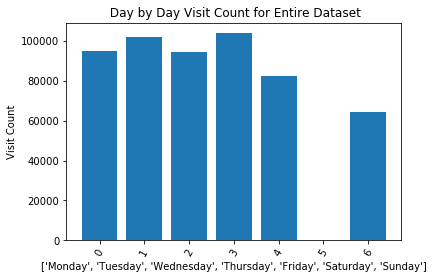

In [10]:
# 7 Identify Busiest Day of the week

day_week_map = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# function to find number of customers visiting each day
def findBusiestDay(df):
    ts_list = pd.to_datetime(df['InvoiceDate']).apply(lambda x: x.date())
    ts_list_tup = [tuple(str(x).split('-')) for x in ts_list]
    weekday_list = [day_week_map.get(dt.date(int(x[0]),int(x[1]),int(x[2])).weekday(),'Unknown') for x in ts_list_tup]
    day_freq_map = {}
    for day in weekday_list:
        day_freq_map[day] = day_freq_map.get(day,0)+1
    return day_freq_map
    
# calling weekday fuction to find busiest day of the week 
day_freq_map = findBusiestDay(retail_landing_df)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
freqs=[]
for day in days:
    freqs.append(day_freq_map.get(day,0))
    
#fig, ax = plt.subplots(1,1)
day_ticks = range(0,7)
day_lables = days
plt.bar(day_ticks,freqs)
plt.xlabel("Day")
plt.ylabel("Visit Count")
plt.title(" Day by Day Visit Count for Entire Dataset")
plt.xticks(day_ticks, rotation=60)
plt.xlabel(day_lables)
plt.show()



    

    

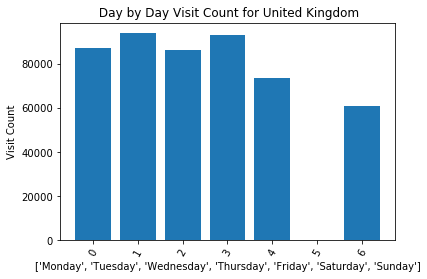

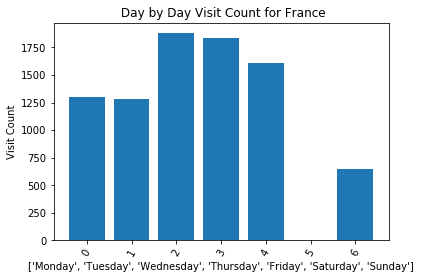

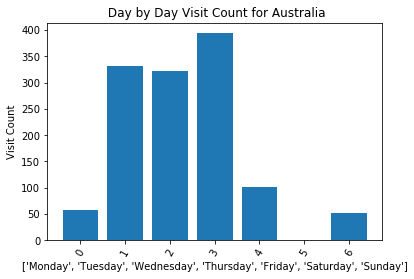

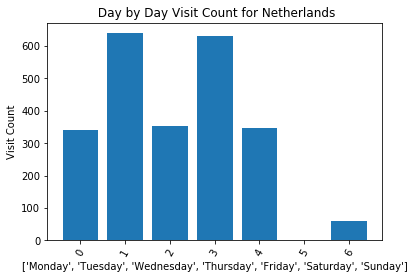

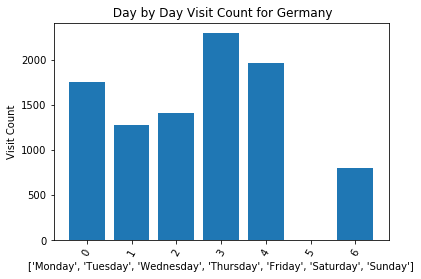

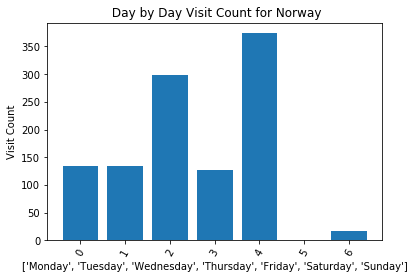

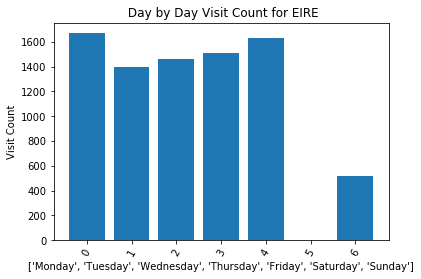

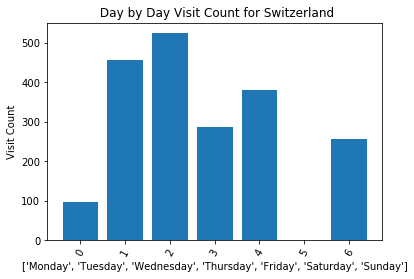

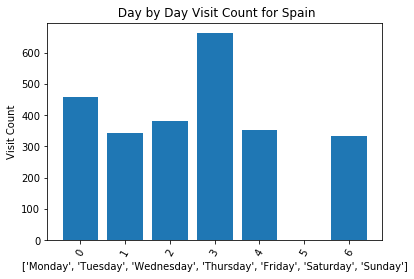

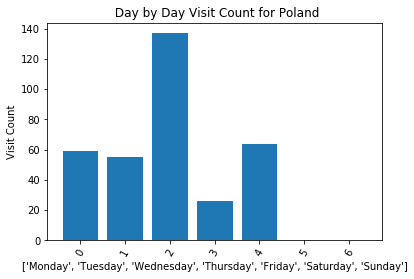

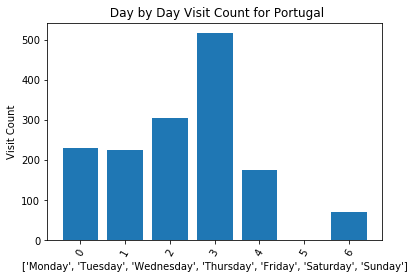

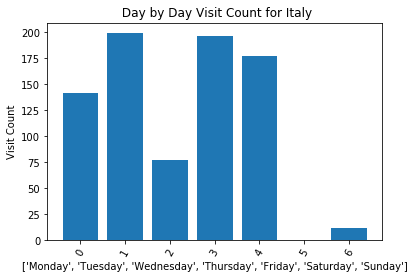

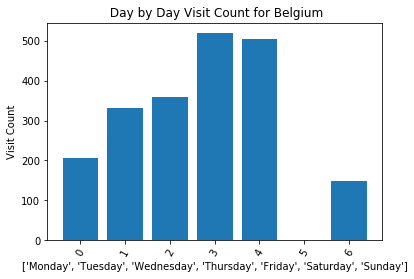

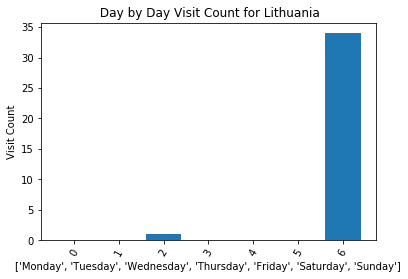

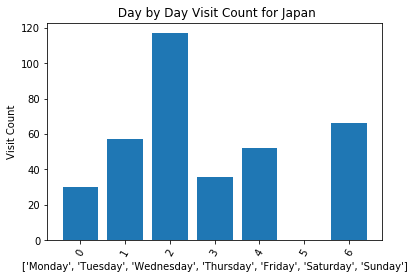

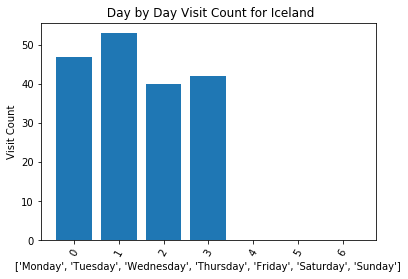

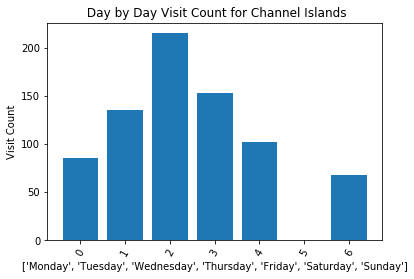

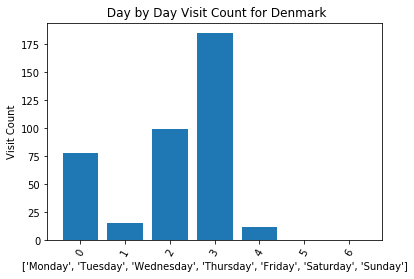

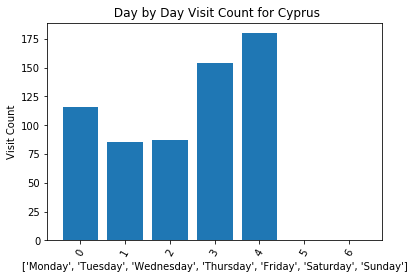

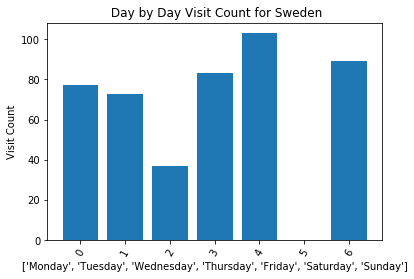

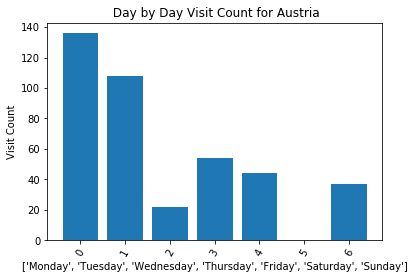

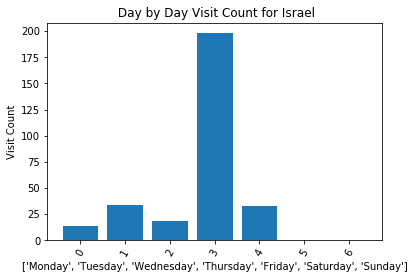

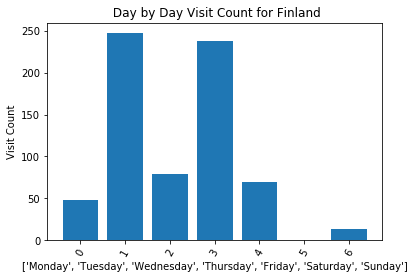

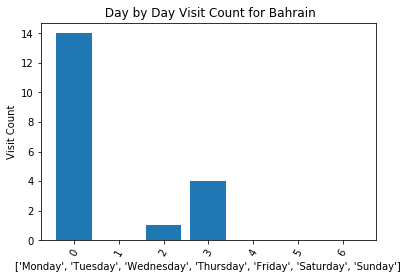

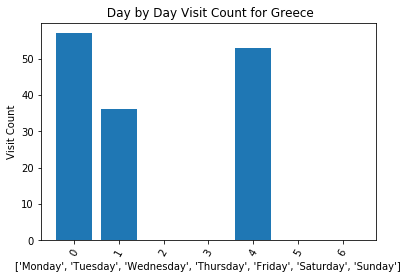

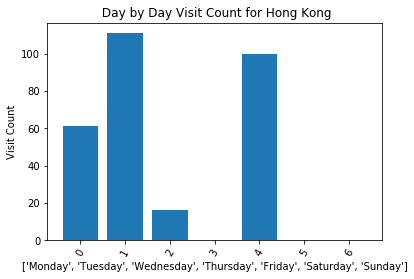

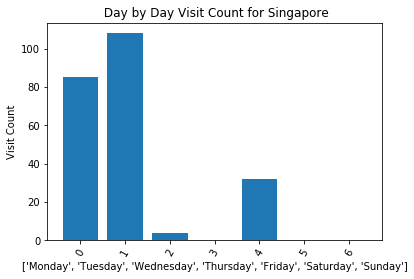

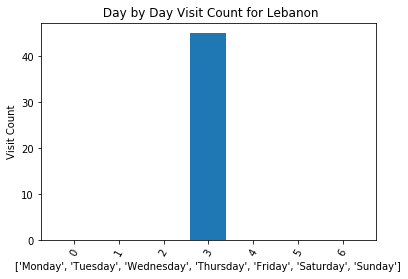

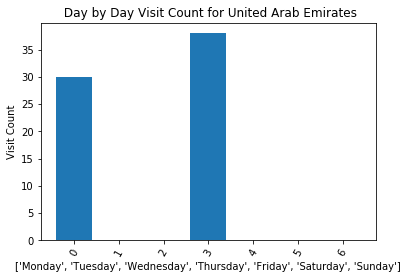

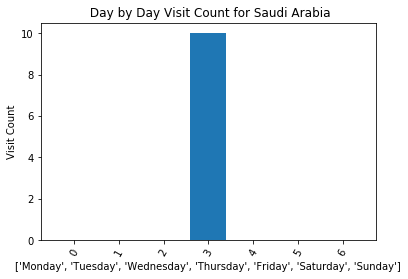

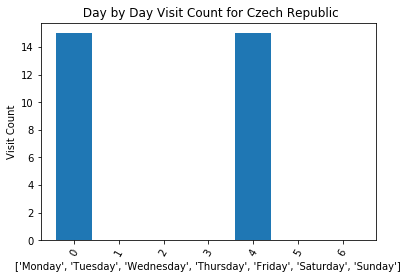

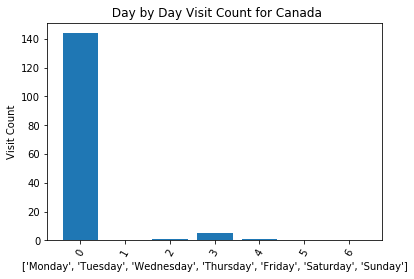

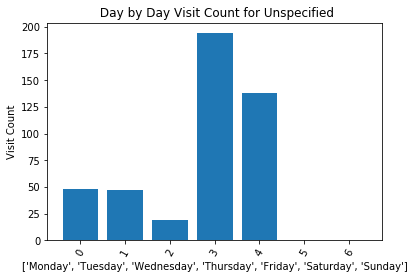

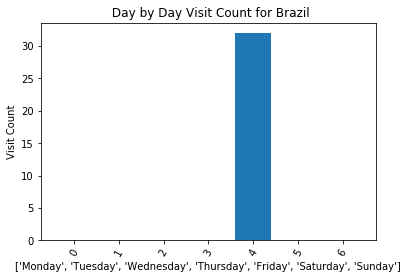

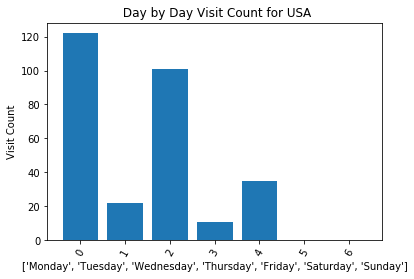

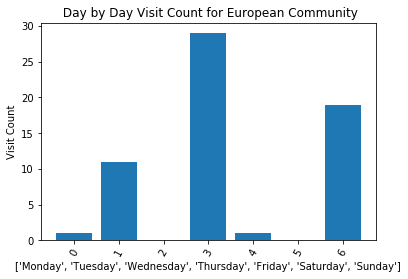

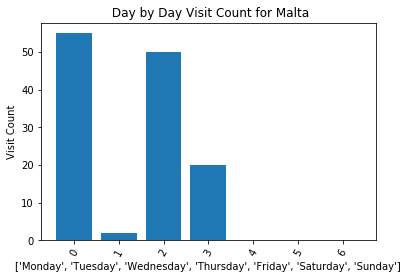

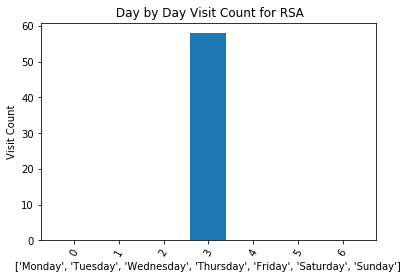

In [11]:
# Busy Days by country

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for country in country_list:
    item_df = retail_landing_df[(retail_landing_df.Country == country)]
    day_freq_map = findBusiestDay(item_df)
    
    freqs=[]
    for day in days:
        freqs.append(day_freq_map.get(day,0))
    
    #fig, ax = plt.subplots(1,1)
    day_ticks = range(0,7)
    day_lables = days
    plt.bar(day_ticks,freqs)
    plt.xlabel("Day")
    plt.ylabel("Visit Count")
    plt.title(" Day by Day Visit Count for " + country)
    plt.xticks(day_ticks, rotation=60)
    plt.xlabel(day_lables)
    plt.show()

    
    

In [12]:
#Creating a new dataframe with only the required columns
customer_details_df = retail_landing_df[['CustomerID','InvoiceNo','Quantity','UnitPrice']]
customer_details_df.head()

,CustomerID,InvoiceNo,Quantity,UnitPrice
0,17850.0,536365,6,2.55
1,17850.0,536365,6,3.39
2,17850.0,536365,8,2.75
3,17850.0,536365,6,3.39
4,17850.0,536365,6,3.39


In [13]:
#Generating top customers by total value of purchases


#Getting the total value of purchase per each item per a invoice number
total_val = customer_details_df[['Quantity','UnitPrice']].product(axis=1)
temp_df = pd.DataFrame(total_val, index=customer_details_df.index, columns=['TotalValue'])

#Creating a new dataframe that contains a column with purchase value per item per invoice number
purchase_customers = pd.concat([customer_details_df,temp_df], axis=1)
purchase_customers['CustomerID'] = purchase_customers['CustomerID'].replace(np.nan, -1)


#Getting the total value of purchases made by the customer in the entire year.
purchase_customers[['CustomerID']] = purchase_customers[['CustomerID']].astype(int)
allpurchase_customer = purchase_customers.groupby('CustomerID').TotalValue.agg('sum')


#creating a list of customerID's
customer_index = []
for i in allpurchase_customer:
    customer_index += list(allpurchase_customer[allpurchase_customer == i].index)


#A dictonary that maps customerID's to total value of purchases
customer_total_purchase = {}
for customer in customer_index:
    if customer != -1:
        customer_total_purchase[customer] = allpurchase_customer[customer]

temp_df = pd.DataFrame({'total_purchase':allpurchase_customer.values, 'CustomerID':allpurchase_customer.index})

#Puting the result of the top 20 customers as per purchase value into a dataframe
final_df = pd.DataFrame()
for k in sorted(customer_total_purchase, key=customer_total_purchase.get, reverse=True)[:20]:
    temp = temp_df[temp_df['CustomerID']== k]
    final_df = pd.concat([final_df,temp])
final_df

,CustomerID,total_purchase
1704,14646,279489.02
4234,18102,256438.49
3759,17450,187482.17
1896,14911,132572.62
56,12415,123725.45
1346,14156,113384.14
3802,17511,88125.38
3203,16684,65892.08
1006,13694,62653.10
2193,15311,59419.34


In [14]:
#Top customers by most visits
transactions_per_customer = purchase_customers.groupby('CustomerID').InvoiceNo.agg('count')

#A dictonary that maps customerID's to total transactions per customer ID
customer_total_transactions = {}
for customer in customer_index:
    if customer != -1:
        customer_total_transactions[customer] = transactions_per_customer[customer]

temp1_df = pd.DataFrame({'total_transactions':transactions_per_customer.values, 'CustomerID':transactions_per_customer.index})

#Puting the result of the top 20 customers as per total transactions into a dataframe
final1_df = pd.DataFrame()
for k in sorted(customer_total_transactions, key=customer_total_transactions.get, reverse=True)[:20]:
    temp = temp1_df[temp1_df['CustomerID']== k]
    final1_df = pd.concat([final1_df,temp])
final1_df

,CustomerID,total_transactions
4043,17841,7983
1896,14911,5903
1301,14096,5128
331,12748,4642
1675,14606,2782
2193,15311,2491
1704,14646,2085
569,13089,1857
699,13263,1677
1448,14298,1640


## Implementing Clustering Algorithms on dataset  : K-means and Agglomerative 

### K-means Clustering 

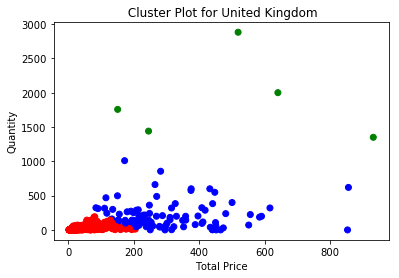

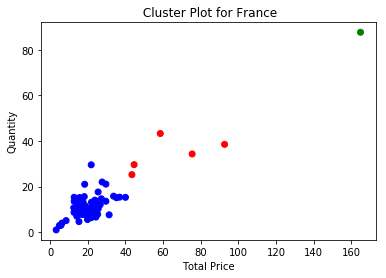

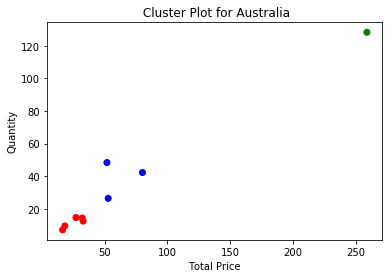

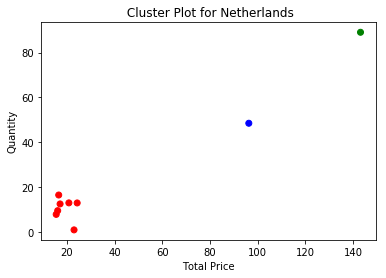

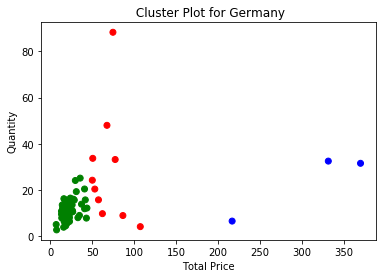

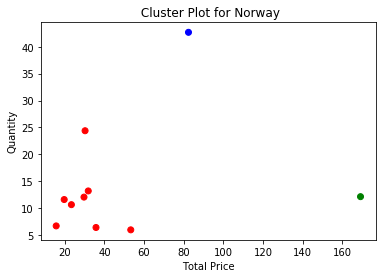

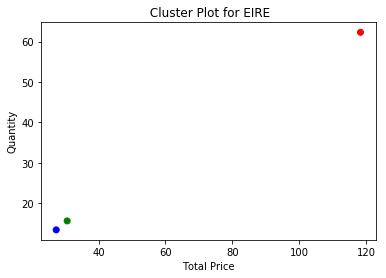

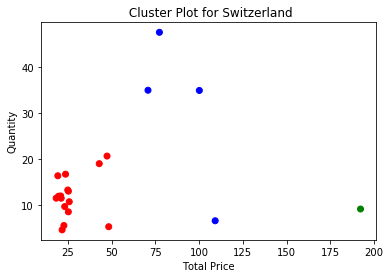

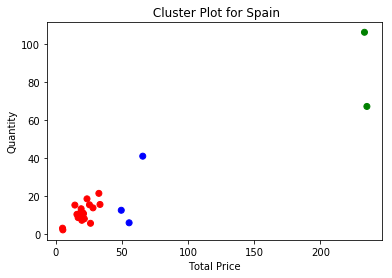

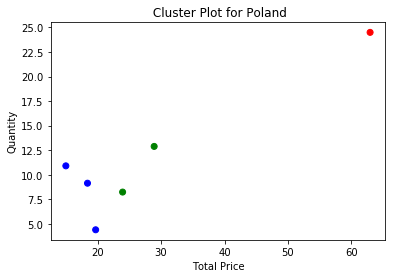

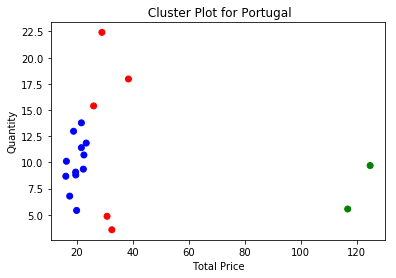

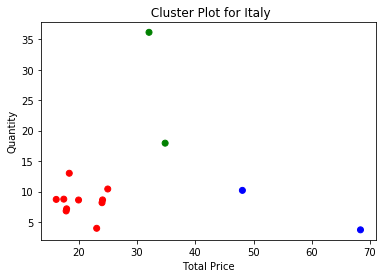

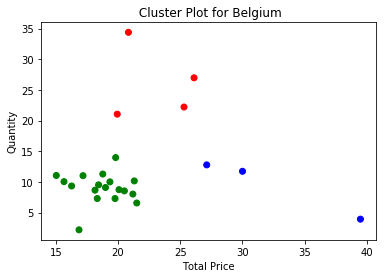

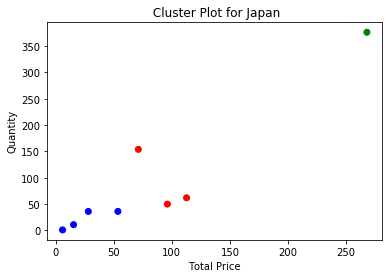

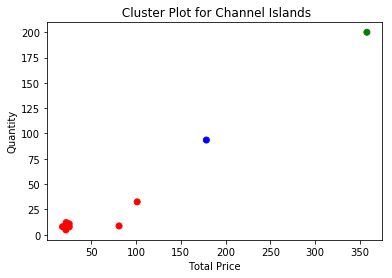

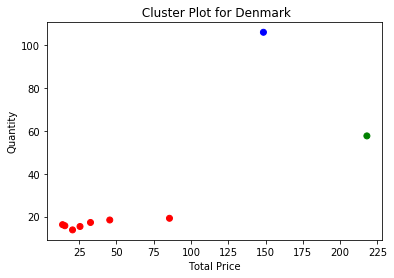

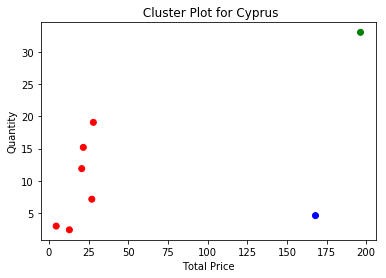

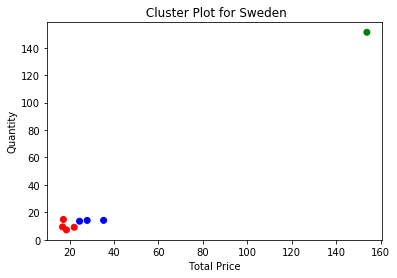

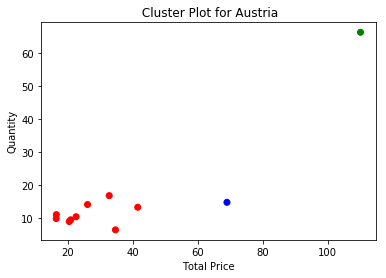

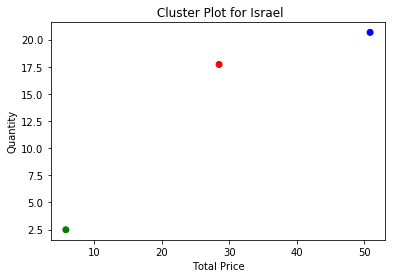

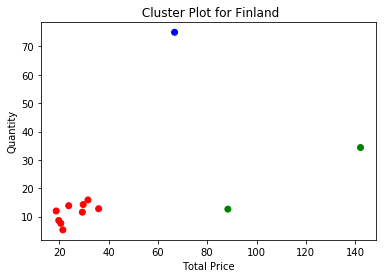

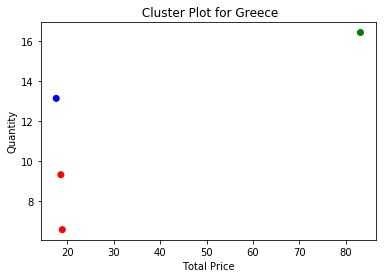

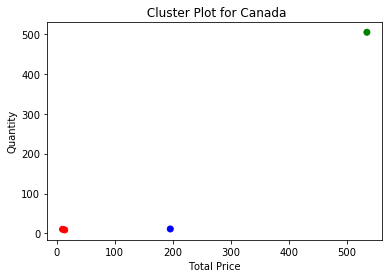

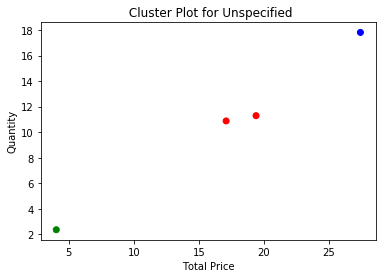

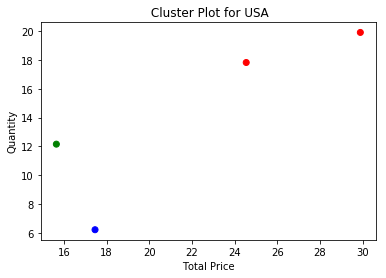

In [15]:
# Clustering based on each country 

# Filtering dataset by country

def getByCountry(df, country):
    return df[(df.Country==country) & (df.TotalPrice > 0) & (df.TotalPrice < 1000)]

for country in country_list:
    
    country_df = getByCountry(retail_landing_df, country)
    if(country_df.shape[0]<10):
        continue;

    #calculating avg quantity per invoice per customer
    avg_quant_per_inv = country_df.groupby(['CustomerID','InvoiceNo'])['Quantity'].mean().to_frame().reset_index()
    avg_quant_per_id = avg_quant_per_inv.groupby(['CustomerID'])['Quantity'].mean().to_frame().reset_index()

    #calculating avg price per invoice per customer
    avg_price_per_inv = country_df.groupby(['CustomerID','InvoiceNo'])['TotalPrice'].mean().to_frame().reset_index()
    avg_price_per_id = avg_price_per_inv.groupby(['CustomerID'])['TotalPrice'].mean().to_frame().reset_index()

    # setting number of clusters . We have tried different cluster numbers and found that 3 is optimal numbers
    number_of_clusters = 3
    cluster_df = pd.merge(avg_quant_per_id,avg_price_per_id)
    if(cluster_df.shape[0] < number_of_clusters):
        continue;
    
    # using k-means algorithm from scikit learn
    kmeans = KMeans(n_clusters=number_of_clusters)
    kmeans.fit(cluster_df[['TotalPrice','Quantity']])
    # storing cluster numbers
    labels = kmeans.labels_
    # list of colors. used to assign colors to cluster labels
    colors_list=['r','g','b','y','m','c','k']
    # assigning colors to cluster labels
    color_cluster = [colors_list[x] for x in labels]
    
    # Generating Cluster plot 
    plt.title(" Cluster Plot for " + country)
    plt.xlabel("Total Price")
    plt.ylabel("Quantity")
    plt.scatter(cluster_df['TotalPrice'],cluster_df['Quantity'],color=color_cluster)
    plt.show()
    
    

### Agglomorative Clustering 

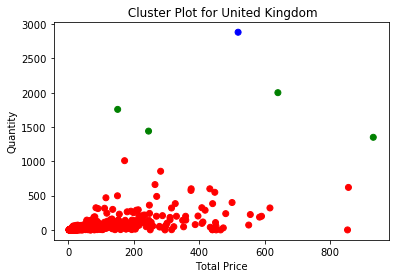

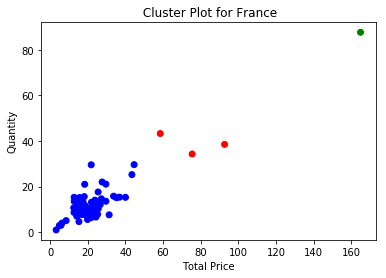

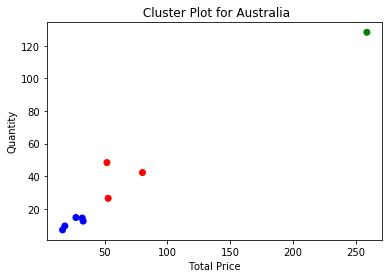

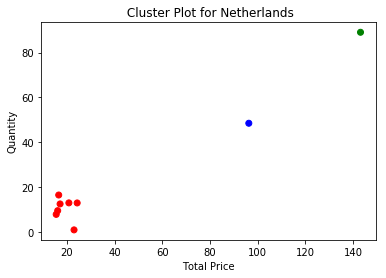

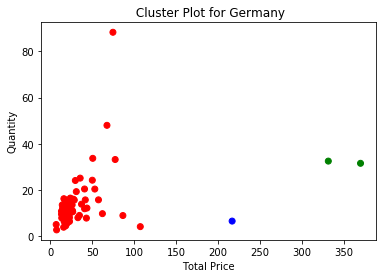

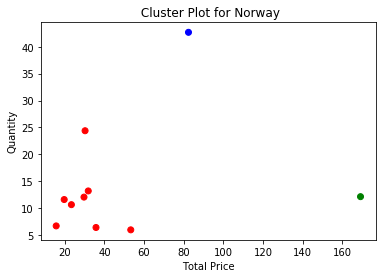

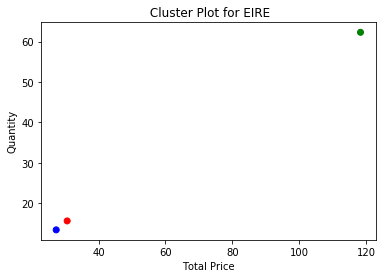

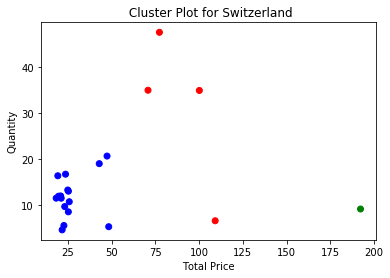

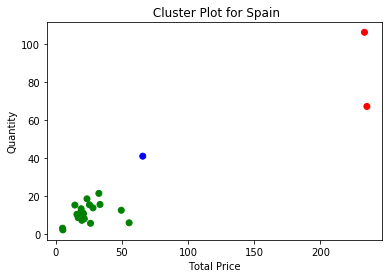

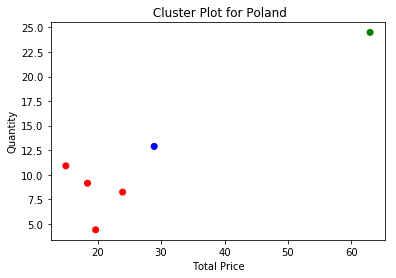

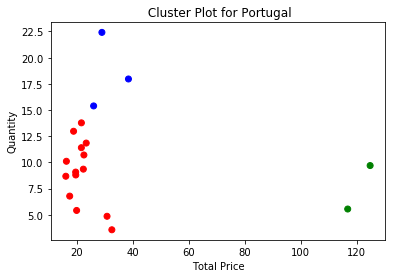

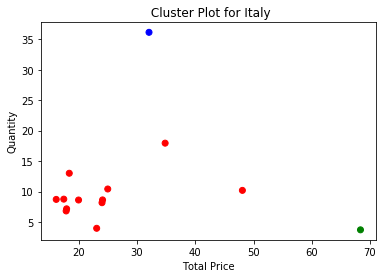

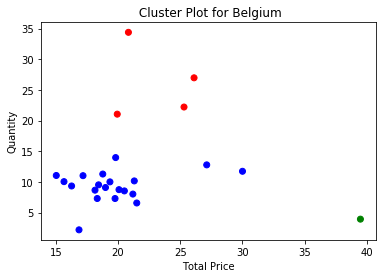

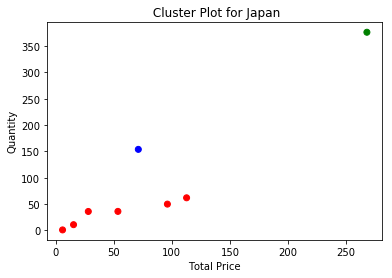

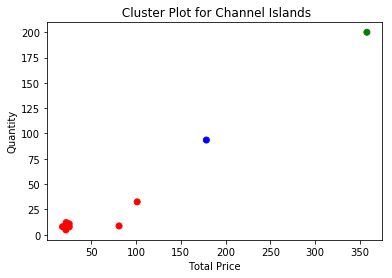

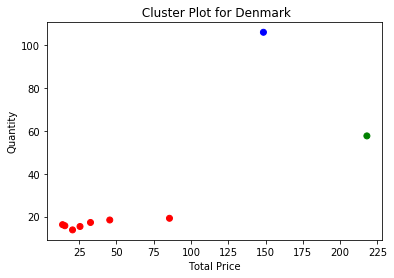

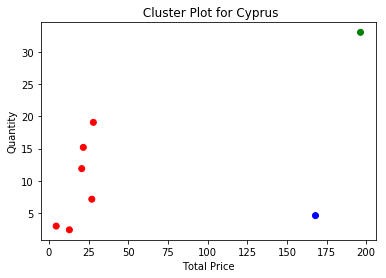

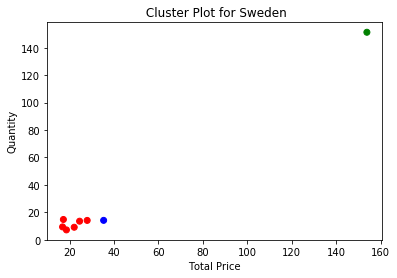

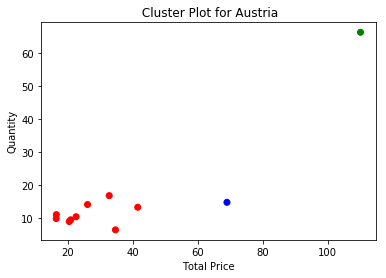

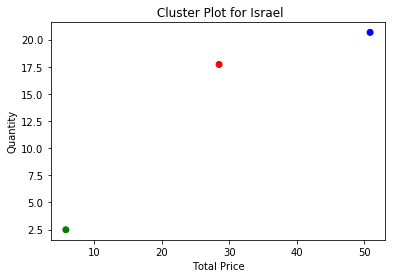

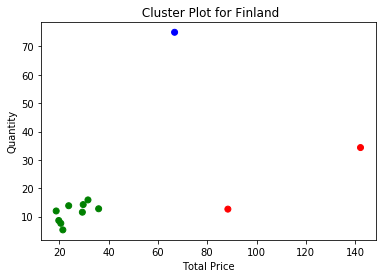

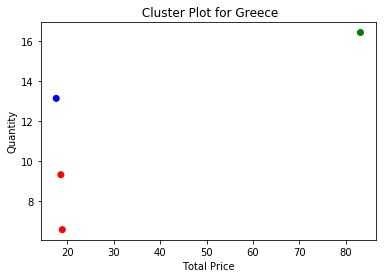

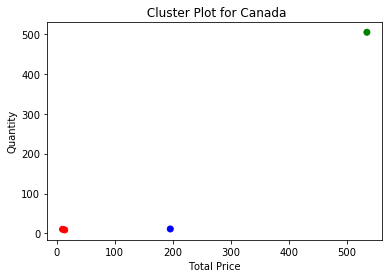

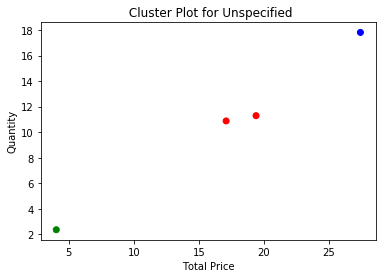

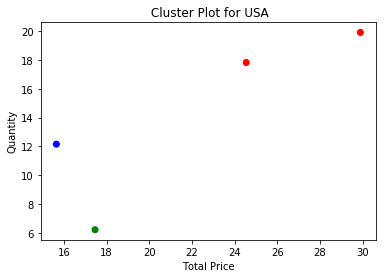

In [16]:
# Agglomerative clustering 

for country in country_list:
    
    country_df = getByCountry(retail_landing_df, country)
    if(country_df.shape[0]<10):
        continue;

    #calculating avg quantity per invoice per customer
    avg_quant_per_inv = country_df.groupby(['CustomerID','InvoiceNo'])['Quantity'].mean().to_frame().reset_index()
    avg_quant_per_id = avg_quant_per_inv.groupby(['CustomerID'])['Quantity'].mean().to_frame().reset_index()

    #calculating avg price per invoice per customer
    avg_price_per_inv = country_df.groupby(['CustomerID','InvoiceNo'])['TotalPrice'].mean().to_frame().reset_index()
    avg_price_per_id = avg_price_per_inv.groupby(['CustomerID'])['TotalPrice'].mean().to_frame().reset_index()

    # setting number of clusters . We have tried different cluster numbers and found that 3 is optimal numbers
    number_of_clusters = 3
    cluster_df = pd.merge(avg_quant_per_id,avg_price_per_id)
    if(cluster_df.shape[0] < number_of_clusters):
        continue;
    
    # using k-means algorithm from scikit learn
    agglo = AgglomerativeClustering(n_clusters=number_of_clusters, linkage='average')
    agglo.fit(cluster_df[['TotalPrice','Quantity']])
    # storing cluster numbers
    labels = agglo.labels_
    # list of colors. used to assign colors to cluster labels
    colors_list=['r','g','b','y','m','c','k']
    # assigning colors to cluster labels
    color_cluster = [colors_list[x] for x in labels]
    
    # Generating Cluster plot 
    plt.title(" Cluster Plot for " + country)
    plt.xlabel("Total Price")
    plt.ylabel("Quantity")
    plt.scatter(cluster_df['TotalPrice'],cluster_df['Quantity'],color=color_cluster)
    plt.show()
    
    

# For the code snippets following this, the input file 'Online_Retail.csv' should contain the columns 
# in the following order

- InvoiceNo	
- StockCode
- Quantity
- InvoiceDate
- UnitPrice
- CustomerID
- Country

Note: Description column is to be deleted from the dataset 

In [17]:
filePath = 'Online_Retail.csv';

# K-Means on given data

The below method applies K-Means algorithm on the given data set, and plots the final result. It also generates VECTOR GRAPHICS for the plots.

# K-Means Algorithm parameters:
- Algorithm Type: k-means++

- Number of iterations: 10

- Intial centroids selection: auto

In [18]:
def plot_KMeans(data_list, num_of_clusters, filename):
    colors = ["g.","r.","c.","y.", "b.","lime","brown","pink","navy", "grey"]
    X = np.array(data_list)
    # Running K-Means on the dataset
    kmeans = KMeans(n_clusters=num_of_clusters, random_state=0, 
                    init='k-means++', n_init=10, algorithm='auto').fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    for i in range(len(X)):
        plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

    plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
    plt.title(filename)
    plt.xlabel('Avg. Quantity')
    plt.ylabel('Avg. Price')
    # EXTRACTING THE PLOT USING VECTOR GRAPHICS
    plt.savefig(filename+'.svg')
    plt.show()

# Read the input CSV file and organize the data to compute Avg. quantity vs Avg. price for each of the customers from United Kingdom, France, and Germany.

The data is segregated by day of week and month of year

In [19]:
LINE_SEPERATOR = '\n'
formatStr = '{0:.2f}'
customerDataByMonth = {}
customerDataByDay = {}
with open(filePath, newline='') as csvfile:
    csvReader = csv.reader(csvfile, delimiter=',', quotechar='|')
    header = next(csvReader)
    for line in csvReader:
        quantity = int(line[2])
        if quantity <= 0:
            continue
        order_date = line[3]
        price = float(line[4])
        customerId = line[5]
        if not bool(customerId.strip()):
            customerId = 'UNKNOWN'
        country = line[6]
        
        order_date = time.strptime(order_date, "%d-%m-%y %H:%M")
        # Determine "day of week" and "month of year" from the order date
        month = calendar.month_name[order_date.tm_mon]
        day = calendar.day_name[order_date.tm_wday]
        
        if country not in customerDataByMonth:
            customerDataByMonth[country] = {}
            customerDataByDay[country] = {}
        
        if month not in customerDataByMonth[country]:
            customerDataByMonth[country][month] = {}
        
        if day not in customerDataByDay[country]:
            customerDataByDay[country][day] = {}
        
        if customerId not in customerDataByMonth[country][month]:
            # List of three values:
            # First value indicates Quantity of purchase
            # Second value indicates Price of purchase
            # Third value keeps count of purchases made(repeated customers). Need this to compute average
            customerDataByMonth[country][month][customerId] = [0,0,0]
        
        if customerId not in customerDataByDay[country][day]:
            # List of three values:
            # First value indicates Quantity of purchase
            # Second value indicates Price of purchase
            # Third value keeps count of purchases made(repeated customers). Need this to compute average
            customerDataByDay[country][day][customerId] = [0,0,0]
        
        customerDataByMonth[country][month][customerId][0] += quantity
        customerDataByMonth[country][month][customerId][1] += price
        customerDataByMonth[country][month][customerId][2]+=1
        
        customerDataByDay[country][day][customerId][0] += quantity
        customerDataByDay[country][day][customerId][1] += price
        customerDataByDay[country][day][customerId][2]+=1

totalCustomers = len(customerDataByMonth)

# Apply K-Means and plot Avg. quantity vs Avg. price for day of week analysis

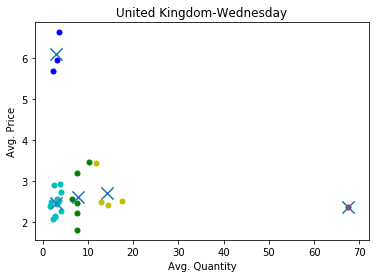

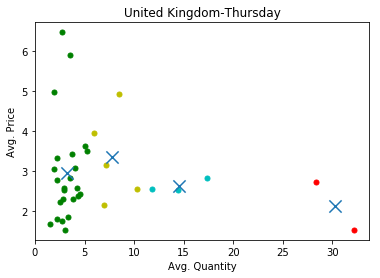

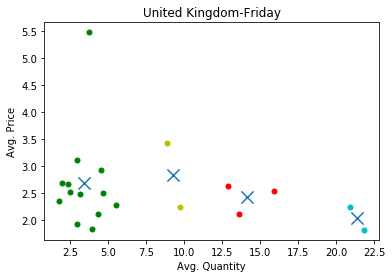

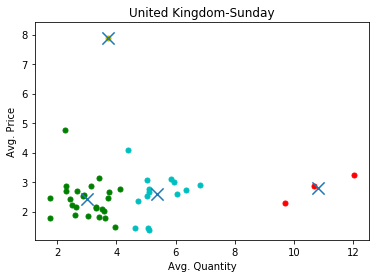

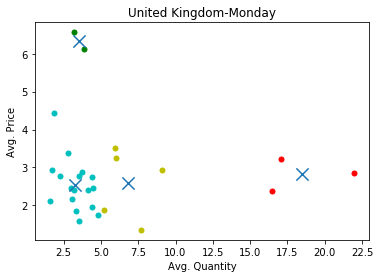

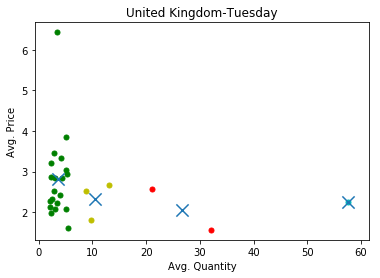

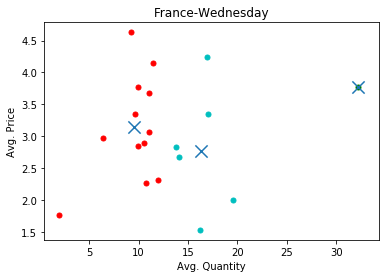

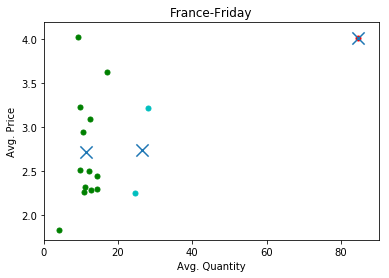

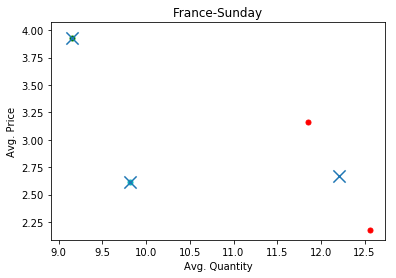

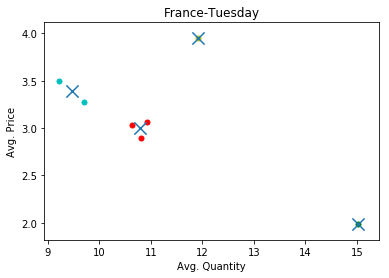

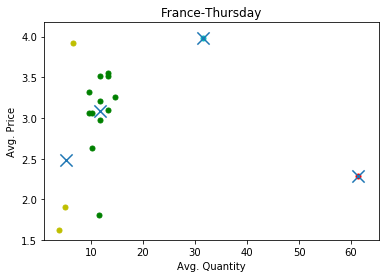

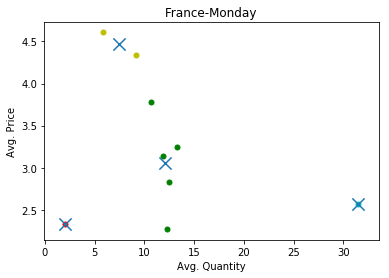

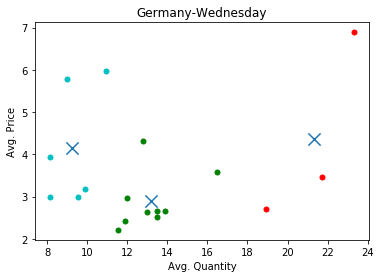

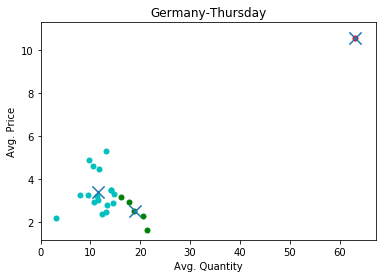

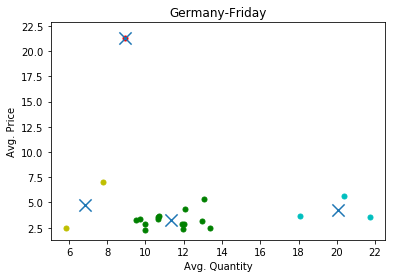

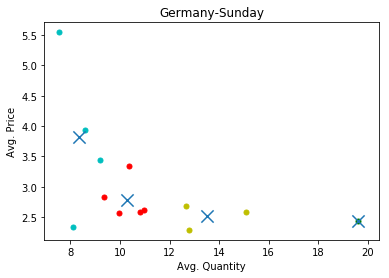

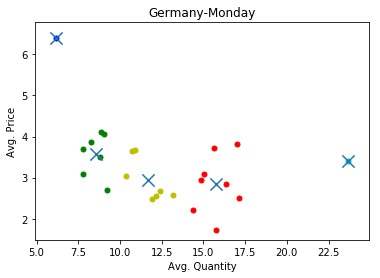

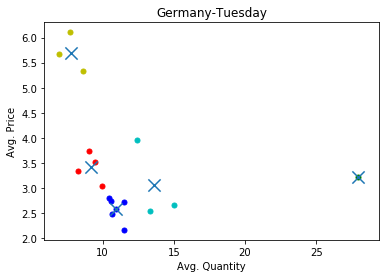

In [20]:
# We have considered customers who have made a certain number of transactions that is above a cut-off
# (specific to each country) 
def getMinCountByForDayCountry(country):
    if country == 'United Kingdom':
        return 200
    elif country == 'France':
        return 40
    elif country == 'Germany':
        return 25

def getClustersForDay(day, country):
    if country == 'United Kingdom':
        if day == 'Wednesday': return 5
        if day == 'Thursday': return 4
        if day == 'Friday': return 4
        if day == 'Sunday': return 4
        if day == 'Monday': return 4
        if day == 'Tuesday': return 4
    elif country == 'France':
        if day == 'Wednesday': return 3
        if day == 'Thursday': return 4
        if day == 'Friday': return 3
        if day == 'Sunday': return 3
        if day == 'Monday': return 4
        if day == 'Tuesday': return 4
    elif country == 'Germany':
        if day == 'Wednesday': return 3
        if day == 'Thursday': return 3
        if day == 'Friday': return 4
        if day == 'Sunday': return 4
        if day == 'Monday': return 5
        if day == 'Tuesday': return 5

for country in customerDataByDay:
    if country != 'Germany' and country != 'United Kingdom' and country != 'France':
        continue
    for day in customerDataByDay[country]:
        data_list = list()
        minTrxCount = getMinCountByForDayCountry(country)
        for customer in customerDataByDay[country][day]:
            data = customerDataByDay[country][day][customer]
            if data[2] < minTrxCount:
                continue
            # Compute Avg. Quantity and Avg. Price, to plot K-Means
            avgQuantity = data[0]/data[2]
            avgPrice = data[1]/data[2]
            data_list.append(tuple((avgQuantity,avgPrice)))
        filename = ''+country+'-'+day
        plot_KMeans(data_list, getClustersForDay(day,country),filename)

# Apply K-Means and plot Avg. quantity vs Avg. price for month of year analysis

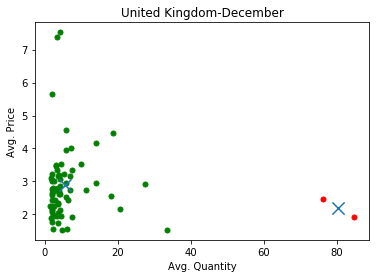

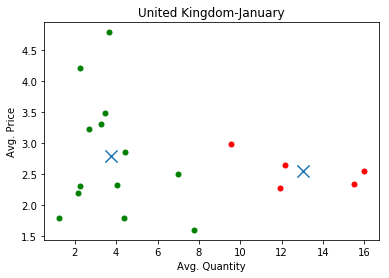

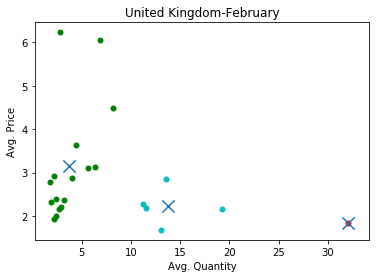

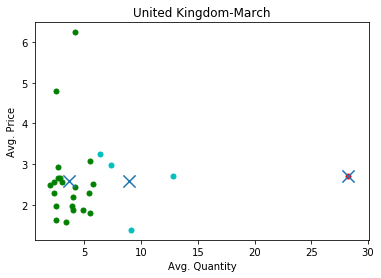

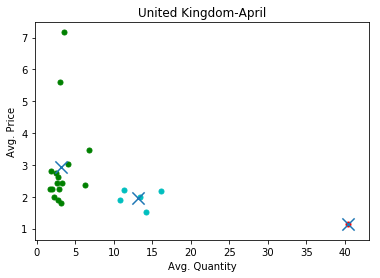

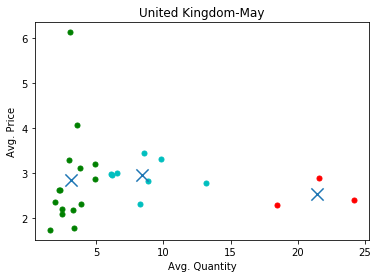

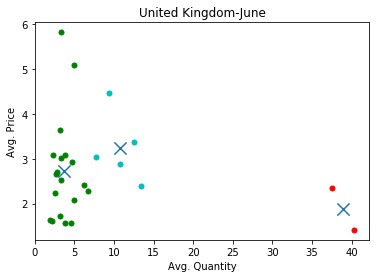

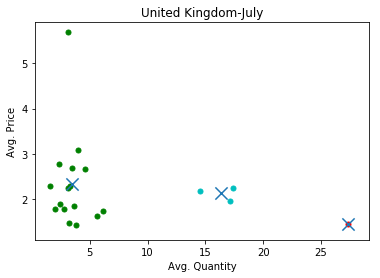

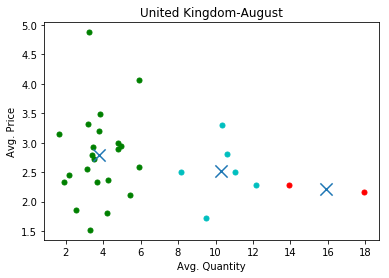

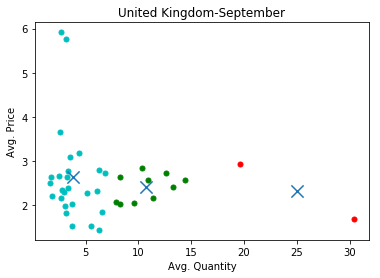

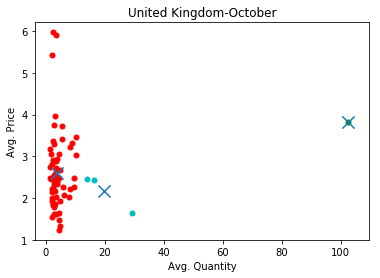

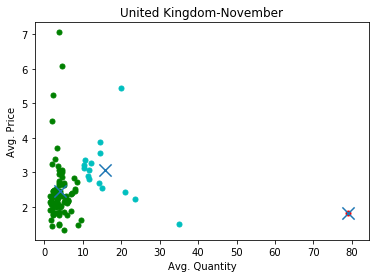

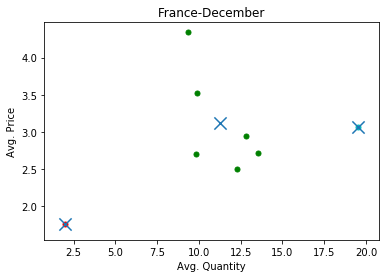

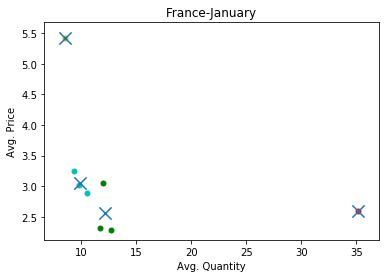

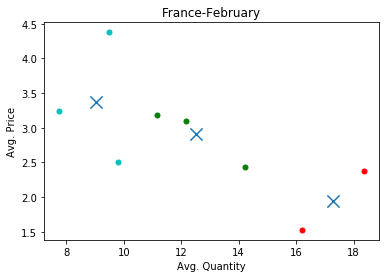

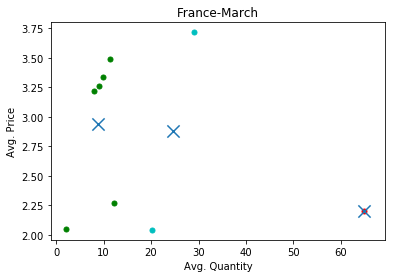

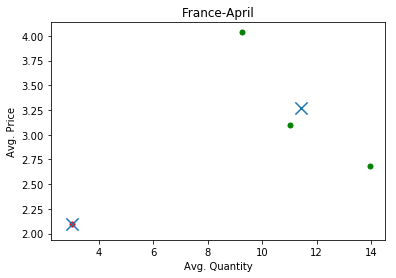

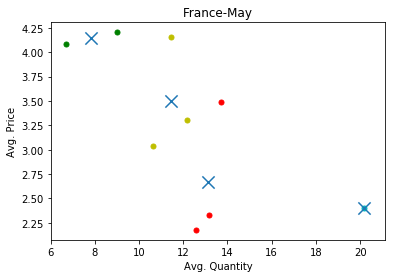

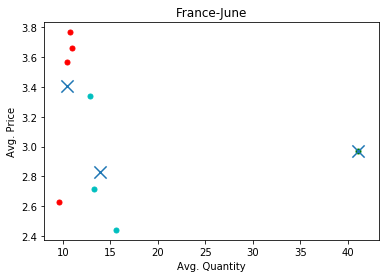

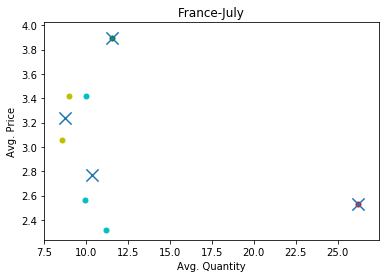

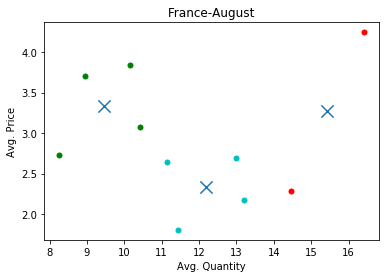

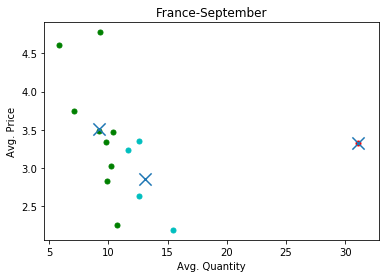

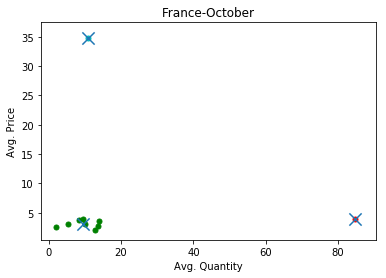

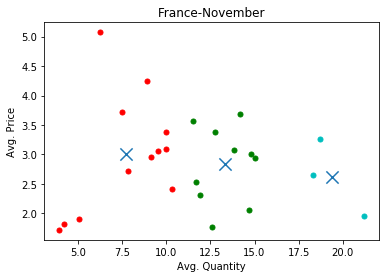

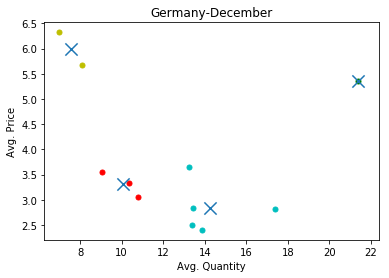

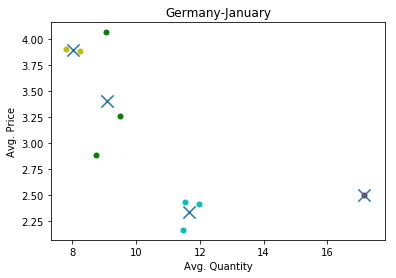

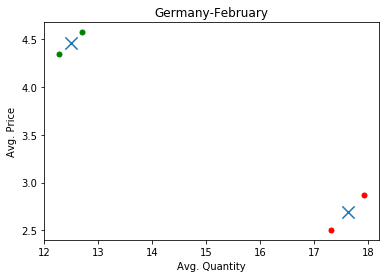

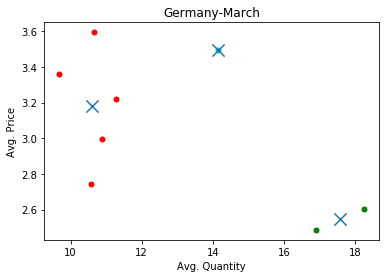

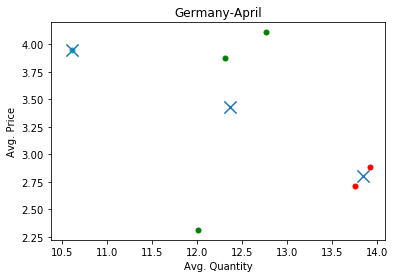

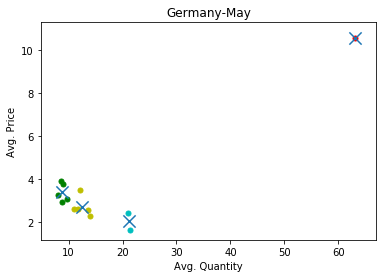

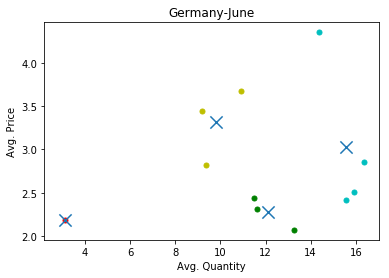

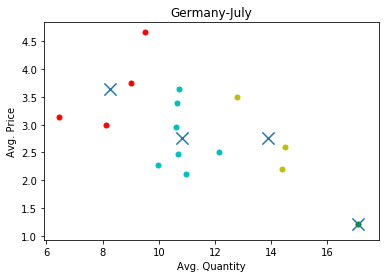

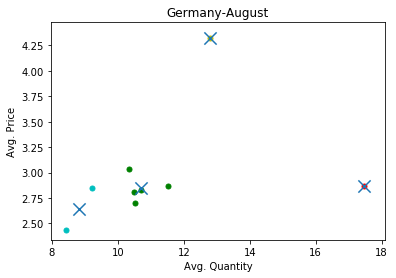

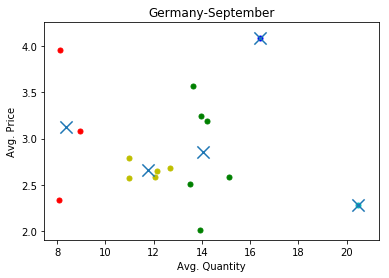

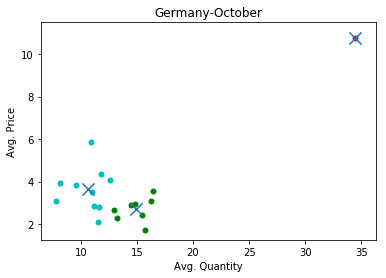

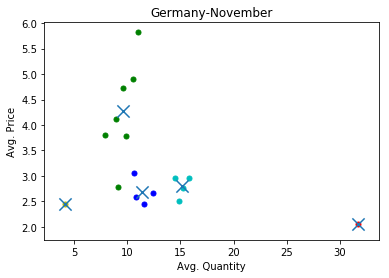

In [21]:
# We have considered customers who have made a certain number of transactions that is above a cut-off
# (specific to each country) 
def getMinCountByMonthForCountry(country):
    if country == 'United Kingdom':
        return 100
    elif country == 'France':
        return 25
    elif country == 'Germany':
        return 25
    

def getClustersForMonth(month,country):
    if country == 'United Kingdom':
        if month == 'December': return 2
        if month == 'January': return 2
        if month == 'February': return 3
        if month == 'March': return 3
        if month == 'April': return 3
        if month == 'May': return 3
        if month == 'June': return 3
        if month == 'July': return 3
        if month == 'August': return 3
        if month == 'September': return 3
        if month == 'October': return 3
        if month == 'November': return 3
    elif country == 'France':
        if month == 'December': return 3
        if month == 'January': return 4
        if month == 'February': return 3
        if month == 'March': return 3
        if month == 'April': return 2
        if month == 'May': return 4
        if month == 'June': return 3
        if month == 'July': return 4
        if month == 'August': return 3
        if month == 'September': return 3
        if month == 'October': return 3
        if month == 'November': return 3
    elif country == 'Germany':
        if month == 'December': return 4
        if month == 'January': return 4
        if month == 'February': return 2
        if month == 'March': return 3
        if month == 'April': return 3
        if month == 'May': return 4
        if month == 'June': return 4
        if month == 'July': return 4
        if month == 'August': return 4
        if month == 'September': return 5
        if month == 'October': return 3
        if month == 'November': return 5
    
for country in customerDataByMonth:
    if country != 'Germany' and country != 'United Kingdom' and country != 'France':
        continue
    for month in customerDataByMonth[country]:
        data_list = list()
        minTrxCount = getMinCountByMonthForCountry(country)
        for customer in customerDataByMonth[country][month]:
            data = customerDataByMonth[country][month][customer]
            if data[2] < minTrxCount:
                continue
            # Compute Avg. Quantity and Avg. Price, to plot K-Means
            avgQuantity = data[0]/data[2]
            avgPrice = data[1]/data[2]
            data_list.append(tuple((avgQuantity,avgPrice)))
        if len(data_list) > 0 :
            filename = ''+country+'-'+month
            plot_KMeans(data_list, getClustersForMonth(month, country),filename)

### Identifying most item purchases for each customer, if there are repeated customers

In [35]:
#CustomerID -> InvoiceNo list
customerInvoice = {}
invoiceQuantity = {}

#InvoiceNo -> StockCode
invoiceStock = {}

#StockCode -> Description (Name)
stockName = {}


# Linking data in dictionaries for CustomerID, InvoiceNo, StockCode
for i in retail_landing_df.index:
    if(not math.isnan(retail_landing_df['CustomerID'][i])):
        customerID = str(int(retail_landing_df['CustomerID'][i])).strip()
        invoiceNo = str(retail_landing_df['InvoiceNo'][i]).strip()
        stockCode = str(retail_landing_df['StockCode'][i]).strip()
        stockDesc = str(retail_landing_df['Description'][i]).strip()
        quantitiy = int(retail_landing_df['Quantity'][i])
        #if not in dict
        if customerID not in customerInvoice:
            customerInvoice[customerID] = set([invoiceNo])
        else:
            customerInvoice[customerID].add(invoiceNo)
        
        if quantitiy > 0:
            if invoiceNo not in invoiceQuantity:
                invoiceQuantity[invoiceNo] = quantitiy
            else:
                invoiceQuantity[invoiceNo] += quantitiy


### Customer's Total Quantity bought till date

In [36]:
customerQuantity = {}

for c, invoices in customerInvoice.items():
    totalQ = 0
    for invoice in invoices:
        if invoice in invoiceQuantity:
            totalQ += invoiceQuantity[invoice]
    customerQuantity[c] = totalQ

In [37]:
# Items bought per Customer

itemsBoughtPerCustomer = list(customerQuantity.values())

### Items bought per customer - Histogram

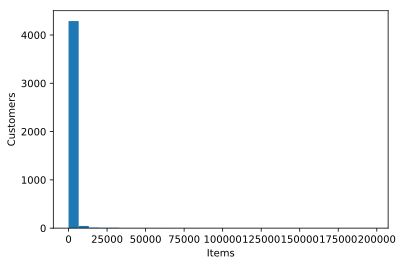

In [39]:
plt.hist(itemsBoughtPerCustomer, bins = 30)
plt.ylabel('Customers')
plt.xlabel('Items')
plt.show()
# plt.savefig('itemsBoughtPerCustomer.svg', format='svg')

Few customers have bought a large number of items (i.e. resellers), which skews the histogram and does not give information for other users. We filter out customers who bought less than 4000 items in their total number of visits

### Filtering items bought per customer

In [40]:
itemsBoughtPerCustomerFiltered = [x for x in itemsBoughtPerCustomer if x < 4000]

### Items bought per customer [Filtered] - Histogram

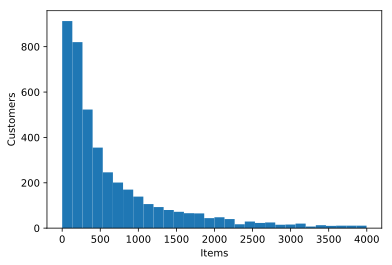

In [41]:
plt.hist(itemsBoughtPerCustomerFiltered, bins=30)
plt.ylabel('Customers')
plt.xlabel('Items')
plt.show()
# plt.savefig('itemsBoughtPerCustomerFiltered.svg', format='svg')

# Time-series plot of transactions by day of week and month of year

This was performed to verify if the results from K-means analysis rightfully identifies the busy buying pattern for both week and month

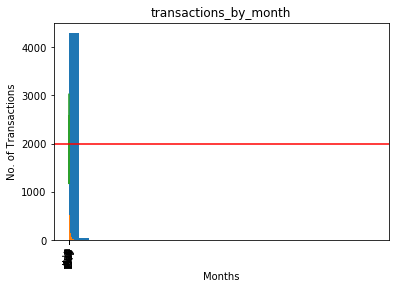

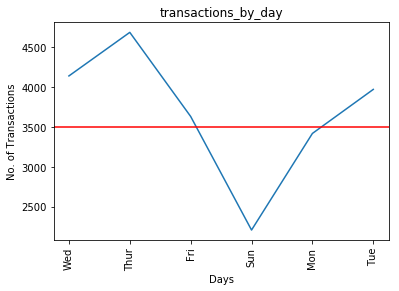

In [28]:
invoiceByMonth ={}
invoiceByDay={}

with open(filePath, newline='') as csvfile:
    csvReader = csv.reader(csvfile, delimiter=',', quotechar='|')
    header = next(csvReader)
    for line in csvReader:
        # Read the invoice number and the order date of the purchase
        invoice = line[0]
        # Ignore cancelled transactions
        if 'C' in invoice:
            continue
        order_date = line[3]
        order_date = time.strptime(order_date, "%d-%m-%y %H:%M")
        # Determine day of week, and month of year for the order date of the purchase
        month = calendar.month_name[order_date.tm_mon]
        day = calendar.day_name[order_date.tm_wday]
        
        # Keep track of invoices based on the month of the year of the purchase
        if month not in invoiceByMonth:
            invoiceByMonth[month] = set()
        invoiceByMonth[month].add(invoice)
        
        # Keep track of invoices based on the day of week of the purchase
        if day not in invoiceByDay:
            invoiceByDay[day] = set()
        invoiceByDay[day].add(invoice)

# Plot month of year vs number of transactions
month_x =[]
month_y = []
idx = 0
for key in invoiceByMonth:
    month_x.append(idx)
    idx+=1
    month_y.append(len(invoiceByMonth[key]))

month_ticks = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov']
plt.plot(month_x, month_y)
plt.xlabel('Months')
plt.axhline(y=2000, color='r', linestyle='-')
plt.ylabel('No. of Transactions')
plt.title('transactions_by_month')
plt.xticks(month_x, month_ticks, rotation='vertical')
plt.savefig('transactions_by_month.svg')
plt.show()


# Plot day of week vs number of transactions
idx = 0
day_x = []
day_y = []
for key in invoiceByDay:
    day_x.append(idx)
    idx+=1
    day_y.append(len(invoiceByDay[key]))

day_ticks = ['Wed','Thur','Fri','Sun','Mon','Tue']
plt.plot(day_x, day_y)
plt.xlabel('Days')
plt.axhline(y=3500, color='r', linestyle='-')
plt.xticks(day_x, day_ticks, rotation='vertical')
plt.ylabel('No. of Transactions')
plt.title('transactions_by_day')
plt.savefig('transactions_by_day.svg')
plt.show()

# Time-series plot of Sales by day, week and Month

This time series plots also agree with what was found previously in K-means. The daily sales data is further analyzed by using a rolling mean window of 15 days.


In [29]:
from pandas import DataFrame
import statsmodels
import time
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [30]:
#Creating a new dataframe with only the required columns
quant_data = retail_landing_df[['InvoiceDate','StockCode','Quantity','UnitPrice']]

#Getting the total value of purchase per each item per a invoice number
ser_val = quant_data[['Quantity','UnitPrice']].product(axis=1)
daf = pd.DataFrame(ser_val, index=quant_data.index, columns=['TotalValue'])

#Creating a new dataframe that contains a column with purchase value per item per invoice number
final_quant_data = pd.concat([quant_data,daf], axis=1)

final_quant_data['InvoiceDate']  = final_quant_data['InvoiceDate'] .astype(str)
final_quant_data['Date'] = final_quant_data['InvoiceDate'].str.split(' ').str[0]
final_quant_data['Date'] = pd.to_datetime(final_quant_data['Date'], format = '%Y-%m-%d')
indexed_df = final_quant_data.set_index('Date')
ts = indexed_df['TotalValue']

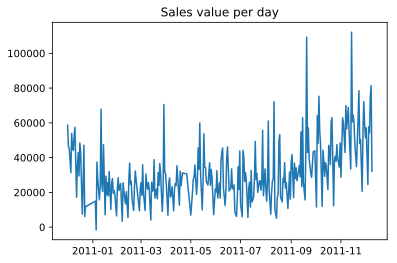

In [31]:
#Aggregating the sales values by date
sale_by_day = indexed_df.groupby('Date').TotalValue.agg('sum')
#Plotting sales data per day
plt.plot(sale_by_day.index.to_pydatetime(), sale_by_day.values)
plt.title('Sales value per day')

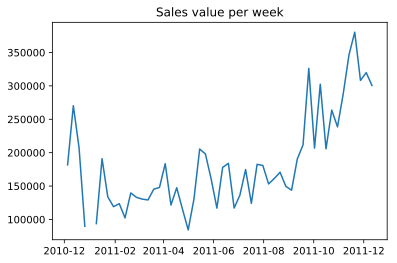

In [32]:
#Aggregating the sales values by week and plotting it
ts_week = sale_by_day.resample('W').sum()
plt.plot(ts_week.index.to_pydatetime(), ts_week.values)
plt.title('Sales value per week')

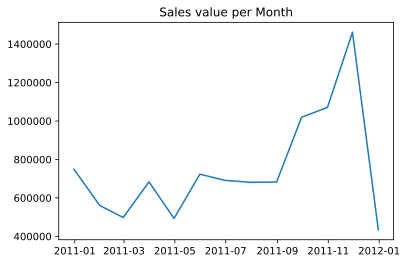

In [33]:
#Aggregating the sales values by month and plotting it
ts_month = sale_by_day.resample('M').sum()
plt.plot(ts_month.index.to_pydatetime(), ts_month.values)
plt.title('Sales value per Month')

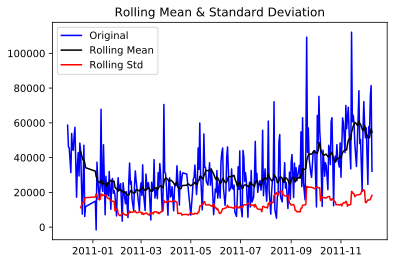

In [34]:
sale_by_day.dropna(inplace=True)
    
#Determing rolling statistics with a 15 day window
rolmean = sale_by_day.rolling(window=15,center=False).mean() 
rolstd = sale_by_day.rolling(window=15,center=False).std()

#Plot rolling statistics:
orig = plt.plot(sale_by_day.index.to_pydatetime(), sale_by_day.values, color='blue',label='Original')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, color='black', label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, color='red', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
#plt.savefig("Rollingstats.svg")